In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.metrics import accuracy_score

# Basic Information

In [3]:
Xero = pd.read_csv("Xero_train.csv")

In [4]:
Xero

,Date,Net_Income,Total_Revenue,Total_amount_of_Invoice,Total_amount_of_Bill,Total_Cost_of_Sales,Gross_Profit,Total_Operating_Expenses,Total_Current_Assets,Total_Assets,Total_Current_Liabilities,Total_Liabilities,Total_Equity,Total_Liabilities_and_Equity
0,2018_09,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
1,2018_10,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
2,2018_11,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
3,2018_12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
4,2019_01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
5,2019_02,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
6,2019_03,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
7,2019_04,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
8,2019_05,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
9,2019_06,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,4130.98,6130.98,6130.98,-2000.00,4130.98


In [5]:
Xero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          25 non-null     object 
 1   Net_Income                    25 non-null     float64
 2   Total_Revenue                 25 non-null     float64
 3   Total_amount_of_Invoice       25 non-null     float64
 4   Total_amount_of_Bill          25 non-null     float64
 5   Total_Cost_of_Sales           25 non-null     float64
 6   Gross_Profit                  25 non-null     float64
 7   Total_Operating_Expenses      25 non-null     float64
 8   Total_Current_Assets          25 non-null     float64
 9   Total_Assets                  25 non-null     float64
 10  Total_Current_Liabilities     25 non-null     float64
 11  Total_Liabilities             25 non-null     float64
 12  Total_Equity                  25 non-null     float64
 13  Total_L

There are no missing values in the dataset

In [6]:
Xero.Net_Income.describe()

count        25.000000
mean      97080.995600
std      221048.395305
min           0.000000
25%           0.000000
50%         366.670000
75%       53238.890000
max      987114.880000
Name: Net_Income, dtype: float64

skew:  3.2047191507115382


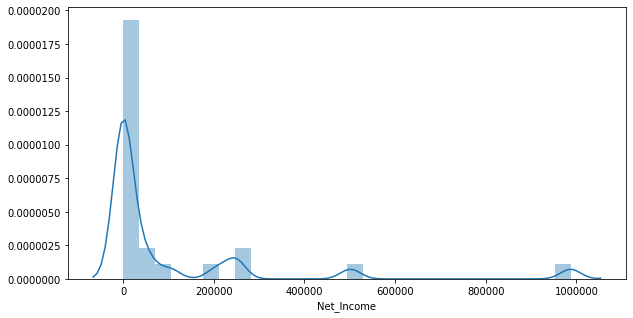

In [7]:
plt.figure(figsize = (10,5))
print('skew: ',Xero.Net_Income.skew())
sns.distplot(Xero['Net_Income'])

We can see that the target variable is skewed.

# Correlation

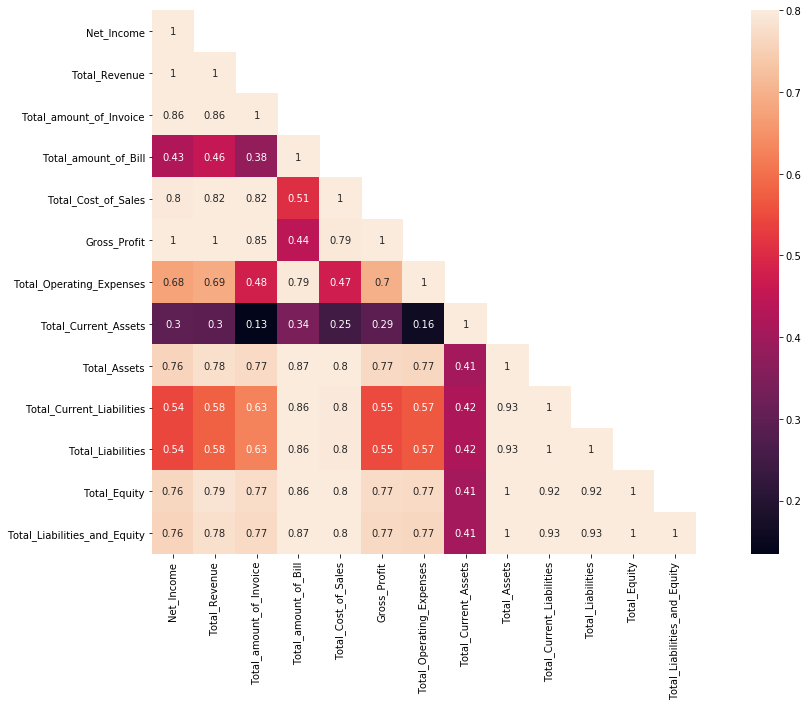

In [8]:
corrMat = Xero.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(20,10))
plt.xticks(rotation=60)
sns.heatmap(corrMat, mask=mask, vmax=0.8, square=True,annot=True)

In [9]:
print(corrMat["Net_Income"].sort_values(ascending=False))

Net_Income                      1.000000
Gross_Profit                    0.999633
Total_Revenue                   0.998756
Total_amount_of_Invoice         0.855928
Total_Cost_of_Sales             0.796643
Total_Equity                    0.764456
Total_Liabilities_and_Equity    0.758614
Total_Assets                    0.758614
Total_Operating_Expenses        0.676452
Total_Liabilities               0.542950
Total_Current_Liabilities       0.542950
Total_amount_of_Bill            0.425350
Total_Current_Assets            0.296165
Name: Net_Income, dtype: float64


A new dataset is composed of 8 features.

In [10]:
del Xero['Total_Cost_of_Sales']
del Xero['Total_Liabilities_and_Equity']
del Xero['Total_Current_Liabilities']
del Xero['Total_Current_Assets']

In [11]:
Xero

,Date,Net_Income,Total_Revenue,Total_amount_of_Invoice,Total_amount_of_Bill,Gross_Profit,Total_Operating_Expenses,Total_Assets,Total_Liabilities,Total_Equity
0,2018_09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2000.00,-2000.00
1,2018_10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2000.00,-2000.00
2,2018_11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2000.00,-2000.00
3,2018_12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2000.00,-2000.00
4,2019_01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2000.00,-2000.00
5,2019_02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2000.00,-2000.00
6,2019_03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2000.00,-2000.00
7,2019_04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2000.00,-2000.00
8,2019_05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2000.00,-2000.00
9,2019_06,0.00,0.00,0.00,0.00,0.00,0.00,4130.98,6130.98,-2000.00


# Scales data and separates data into training data and test data

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

In [13]:
model_df = Xero

In [14]:
def tts(data):
    data = data.drop(['Net_Income', 'Date'], axis=1)
    train, test = data[0:22].values, data[-15:].values

    return train, test

train, test = tts(model_df)

In [15]:
train.shape, test.shape

((22, 8), (15, 8))

In [16]:
def scale_data(train_set, test_set):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)
    
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)

    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)

    X_train, y_train = train_set_scaled[:,1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:,1:], test_set_scaled[:, 0:1].ravel()
    
    return X_train, y_train, X_test, y_test, scaler

The purpose of scaling data is to eliminate the difference of characteristics and order of magnitude between different samples, and convert it into a dimensionless relative value. The value of each sample characteristic quantify is in the same order of magnitude.

In [17]:
def undo_scaling(y_pred, x_test, scaler_obj, lstm=False):
    y_pred = y_pred.reshape(y_pred.shape[0],1, 1)
    
    if not lstm:
        x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
        
    pred_test_set = []
    for index in range(0, len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index], x_test[index]], axis=1))
    
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
    
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)
    
    return pred_test_set_inverted

For visualizing and comparing results, undoes the scaling effect on predictions.

In [18]:
def predict_df(unscaled_predictions, original_df):
    result_list = []
    NI_dates = list(original_df[-16:].Date)
    act_NI = list(original_df[-22:].Net_Income)

    for index in range(0, len(unscaled_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscaled_predictions[index][0] + act_NI[index])
        result_dict['date'] = NI_dates[index+1]
        result_list.append(result_dict)

    df_result = pd.DataFrame(result_list)

    return df_result

Generates a dataframe that shows the predicted net income for each month for plotting results.

In [19]:
model_scores = {}

def get_scores(unscaled_df, original_df, model_name):
    rmse = np.sqrt(mean_squared_error(original_df.Net_Income[-15:],unscaled_df.pred_value[-15:]))
    mae = mean_absolute_error(original_df.Net_Income[-15:], unscaled_df.pred_value[-15:])
    r2 = r2_score(original_df.Net_Income[-15:], unscaled_df.pred_value[-15:])
    model_scores[model_name] = [rmse, mae]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae/100}%")
    print(f"R2 Score: {r2}")

Prints the root mean squared error, mean absolute error

In [20]:
def plot_results(results, original_df, model_name):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.lineplot(original_df.Date, original_df.Net_Income, data=original_df, ax=ax, label='Original', color='mediumblue')
    sns.lineplot(results.date, results.pred_value, data=results, ax=ax, label='Predicted', color='red')
    ax.set(xlabel='Date', ylabel='Net Income', title=f"{model_name} Net Income Forecasting Prediction")
    ax.legend()
    sns.despine
    plt.savefig(f'{model_name}_forecast.png')

Plots predictions over original data to visualize results.

# Build Model

In [21]:
def regressive_model(train_data, test_data, model, model_name):
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    
    original_df = pd.read_csv('Xero_test.csv')
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)
    
    plot_results(unscaled_df, original_df,model_name)
    get_scores(unscaled_df, original_df, model_name)
    
    a = original_df['Date'][10:]
    b = unscaled_df['pred_value']
        
    pred_df = pd.DataFrame(zip(a,b), columns = ['Date', 'prediction'])
    pred_dic = pred_df.set_index('Date').T.to_dict('list')
    pred_outcome = {model_name: pred_dic}

    return pred_outcome

Runs regressive models in SKlearn framework. First calls scale_data to split into X and y and scale the data. Then fits and predicts. Finally, predictions are unscaled, scores are printed, and results are plotted and saved.

##### Model 1 - Linear regression

RMSE: 71178.67717845137
MAE: 252.8740733333333%
R2 Score: 0.9251726500324237


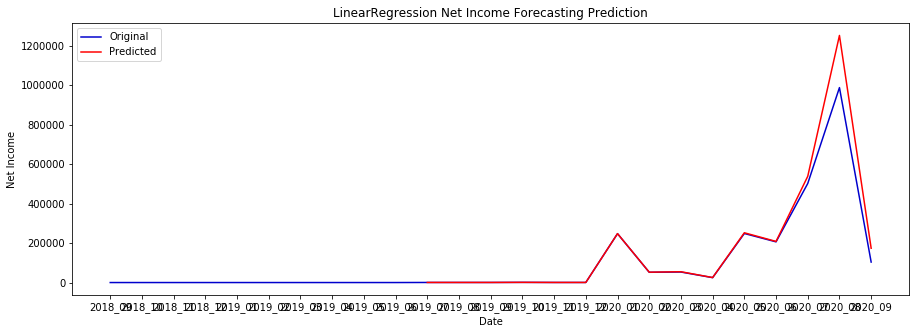

In [22]:
Linear_Regression = regressive_model(train, test, LinearRegression(), 'LinearRegression')

##### Model 2 - Random forest regressor

RMSE: 156442.98565733415
MAE: 715.8912066666666%
R2 Score: 0.6385296071670354


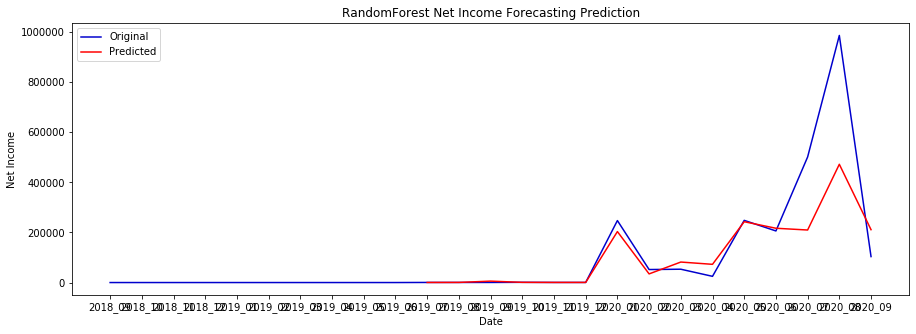

In [23]:
Random_Forest = regressive_model(train, test, RandomForestRegressor(n_estimators = 10),'RandomForest')

##### Model 3 - XGBoost

RMSE: 151907.26377564983
MAE: 530.5311266666666%
R2 Score: 0.6591858466789423


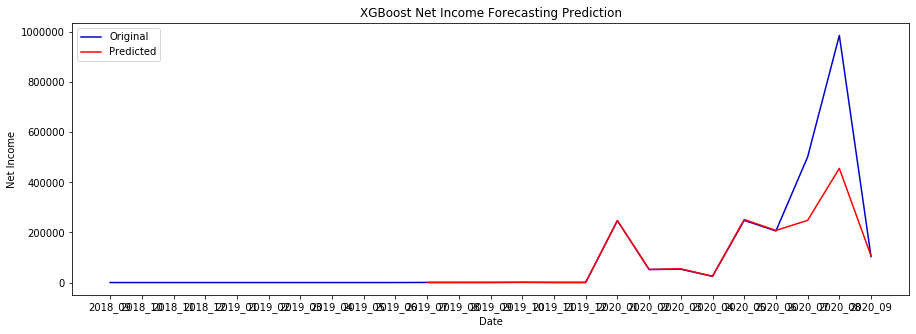

In [24]:
XGBoost = regressive_model(train, test, XGBRegressor(n_estimators=100, learning_rate=0.2, objective='reg:squarederror'),'XGBoost')

##### Model 4 - Long Short - Term Memory

In [25]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM

In [26]:
def lstm_model(train_data, test_data):
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
    model.add(Dense(1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False)
    predictions = model.predict(X_test, batch_size=1)
    
    original_df = pd.read_csv('Xero_test.csv')
    unscaled = undo_scaling(predictions, X_test, scaler_object, lstm=True)
    unscaled_df = predict_df(unscaled, original_df)
    
    get_scores(unscaled_df, original_df, 'LSTM')
    plot_results(unscaled_df, original_df, 'LSTM')
    
    a = original_df['Date'][10:]
    b = unscaled_df['pred_value']
        
    pred_df = pd.DataFrame(zip(a,b), columns = ['Date', 'prediction'])
    pred_dic = pred_df.set_index('Date').T.to_dict('list')
    pred_outcome = {'LSTM':pred_dic}
    
    return pred_outcome

Epoch 1/200
22/22 [==============================] - 0s 1ms/step - loss: 0.8928
Epoch 2/200
22/22 [==============================] - 0s 1ms/step - loss: 0.8570
Epoch 3/200
22/22 [==============================] - 0s 861us/step - loss: 0.8291
Epoch 4/200
22/22 [==============================] - 0s 816us/step - loss: 0.7789
Epoch 5/200
22/22 [==============================] - 0s 861us/step - loss: 0.6915
Epoch 6/200
22/22 [==============================] - 0s 816us/step - loss: 0.5808
Epoch 7/200
22/22 [==============================] - 0s 816us/step - loss: 0.4693
Epoch 8/200
22/22 [==============================] - 0s 816us/step - loss: 0.3896
Epoch 9/200
22/22 [==============================] - 0s 861us/step - loss: 0.3403
Epoch 10/200
22/22 [==============================] - 0s 725us/step - loss: 0.3104
Epoch 11/200
22/22 [==============================] - 0s 725us/step - loss: 0.2921
Epoch 12/200
22/22 [==============================] - 0s 771us/step - loss: 0.2806
Epoch 13/200
22/2

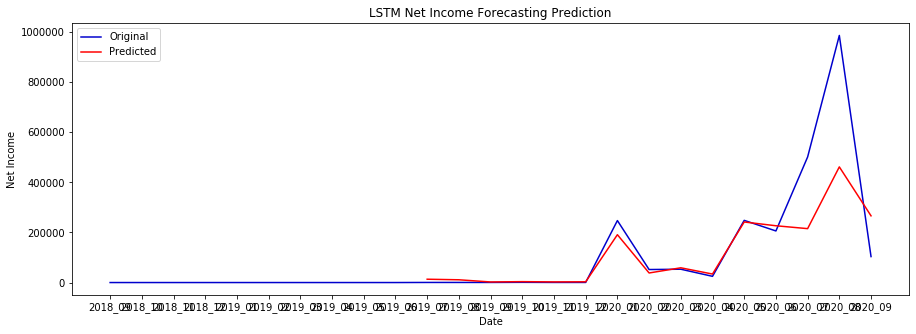

In [27]:
LSTM = lstm_model(train, test)

# Feature forecast

In [28]:
from collections import deque
import itertools

def moving_average(data_array, n=3):
    '''
    Calcuate the moving average based on the specific data array.
    :param data_array: the array stored data to be calculated.
    :param n: the number of data in one time
    :return: Generate which contains the result
     '''
    it = iter(data_array)
    
    d = deque(itertools.islice(it, n - 1))
    s = sum(d)
    # In the first round, to avoid getting extra element, so need zero in the head of queue.
    d.appendleft(0)
    for elem in it:
        s += elem - d.popleft()
        d.append(elem)
        yield s / float(n)

In [29]:
def MA(name):
    Xero = pd.read_csv('Xero_test.csv')
    Date = Xero['Date'][2:].values.tolist()
    features = Xero[name].values.tolist()
    features_MA = list(moving_average(features))
    
    #Put these lists together
    a = Date
    b = features_MA   
    pred_df = pd.DataFrame(zip(a,b), columns = ['Date', 'prediction'])
    pred_dic = pred_df.set_index('Date').T.to_dict('list')
    pred_outcome = {'Moving Average':pred_dic}
    
    return pred_outcome

In [30]:
#You can change different features to get different outcome
MovingAverage = MA('Net_Income')

In [31]:
MovingAverage

{'Moving Average': {'2018_11': [0.0],
  '2018_12': [0.0],
  '2019_01': [0.0],
  '2019_02': [0.0],
  '2019_03': [0.0],
  '2019_04': [0.0],
  '2019_05': [0.0],
  '2019_06': [0.0],
  '2019_07': [122.55666666666667],
  '2019_08': [243.28],
  '2019_09': [363.50333333333333],
  '2019_10': [515.3933333333333],
  '2019_11': [517.5600000000001],
  '2019_12': [519.5600000000001],
  '2020_01': [82767.76333333334],
  '2020_02': [99960.79666666668],
  '2020_03': [117584.87],
  '2020_04': [43329.27666666665],
  '2020_05': [108805.29666666665],
  '2020_06': [159744.9833333333],
  '2020_07': [318669.39666666667],
  '2020_08': [564915.7466666667],
  '2020_09': [530795.38]}}

# Save Prediction

In [32]:
def to_json(x):
    jsonData = json.dumps(x, indent=1)
    fileObject = open('Outcome.json', 'a+')
    fileObject.write(jsonData)
    fileObject.close()

Save all the predictions to json file

In [33]:
to_json(Linear_Regression)
to_json(Random_Forest)
to_json(XGBoost)
to_json(LSTM)
to_json(MovingAverage)